#HW1 - Data Exploration and Preparation

In [ ]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24 }
pylab.rcParams.update(params)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading the dataset

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
virus_dataset = pd.read_csv(filename, header=0)

##First Look

In [ ]:
virus_dataset.shape

In [ ]:
virus_dataset['conversations_per_day'].value_counts()

In [ ]:
virus_dataset['sport_activity'].value_counts()

In [ ]:
virus_dataset['happiness_score'].value_counts()

In [ ]:
virus_dataset.columns

In [ ]:
virus_dataset.info()

##Partitioning the data


In [ ]:
#data = virus_dataset[virus_dataset.columns[:24]]
#targets = virus_dataset[virus_dataset.columns[-2:]]
#data_train, data_test, targets_train, targets_test= train_test_split(
#    data, targets, test_size=0.2, random_state=133)

data_train, data_test = train_test_split(
    virus_dataset, test_size=0.2, random_state=133)
data_train

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
256,34,29,F,56.6,A+,"('22.75218', '72.68533')",2,9,2,3,...,91.991738,-5.700317,112.850913,19.022486,1.600888,8.105269,1.019798,0.799955,-1,-1
351,1246,48,F,69.6,O+,"('-7.54972', '110.71639')",0,8,2,7,...,-90.340184,-4.748222,204.938217,21.951817,3.442616,4.273379,0.905969,8.842312,1,1
348,810,28,M,80.9,AB+,"('11.93381', '79.82979')",1,9,1,13,...,-90.372167,-6.575695,151.530975,-14.272414,4.124909,5.127900,-2.789673,6.333419,1,1
109,725,16,M,54.3,A+,"('-26.22861', '-52.67056')",1,10,3,8,...,-51.014912,-10.508345,28.369077,11.987076,4.333476,5.161051,-8.534867,-6.303868,-1,-1
1093,861,10,M,30.6,O+,"('48.21644', '9.02596')",0,8,2,2,...,96.431075,-1.417134,285.079071,-8.209959,5.932142,2.562992,7.322826,-10.928784,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1619,11,F,33.2,O-,"('9.91861', '-68.30472')",1,9,6,4,...,-67.359936,-3.623306,126.624634,21.741693,1.246688,5.097238,4.108790,-2.334492,1,1
1025,1175,5,M,18.1,A+,"('-5.85746', '144.23058')",2,7,3,4,...,4.044351,-6.074163,100.481991,-26.935734,0.951585,0.658245,-2.707125,0.232490,-1,-1
1080,896,17,M,89.8,O+,"('-13.7804', '34.4587')",1,10,0,1,...,15.161088,-4.707515,74.738408,-6.986699,2.550524,2.414891,0.746937,-4.522514,-1,1
904,1852,52,M,61.8,O+,"('37.65181', '120.33063')",3,10,1,4,...,-52.612026,-3.842674,228.561174,-12.295060,2.202224,1.905380,3.927934,-11.242184,-1,-1


##Basic data exploration

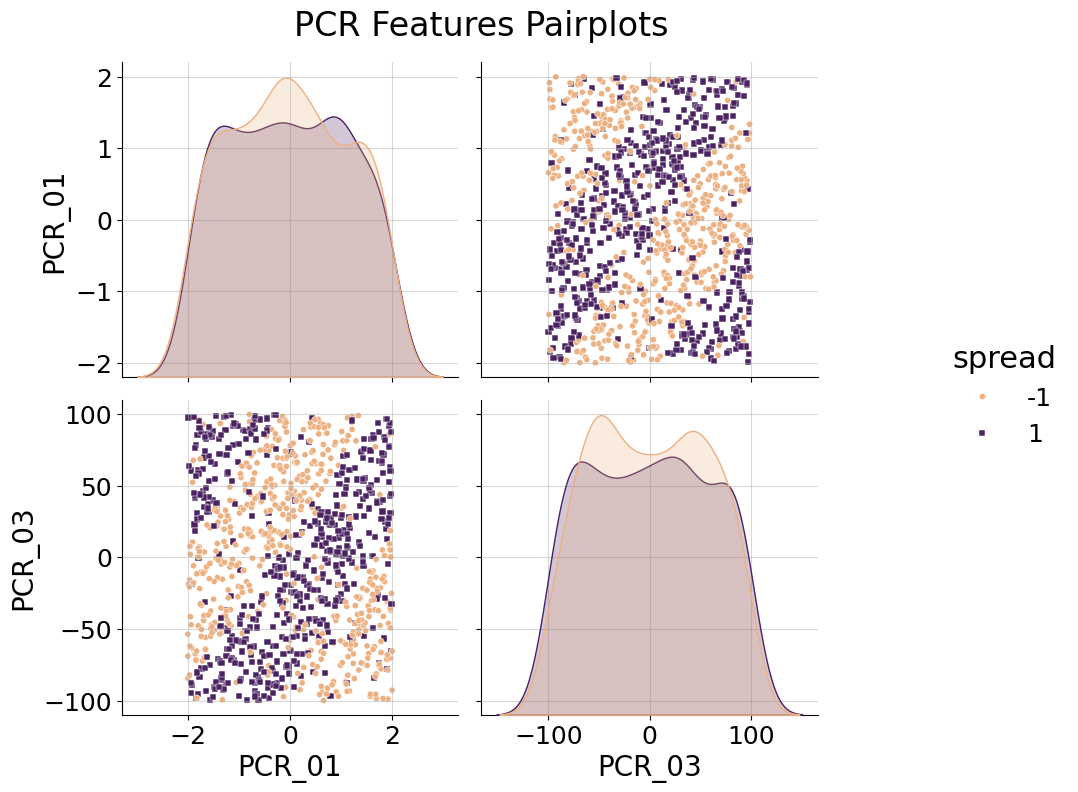

In [ ]:

g = sns.pairplot(data_train, hue="spread",
             vars = ['PCR_01', 'PCR_03'], markers=["o", "s"], palette = "flare",
             plot_kws={"s": 20})
g.fig.suptitle("PCR Features Pairplots", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [ ]:
X_PCR_01 = data_train['PCR_01']
X_PCR_03 = data_train['PCR_03']
Y_spread = data_train['spread']

print("Correlation is:{:.3f}".format(X_PCR_01.corr(Y_spread)))
print("Correlation is:{:.3f}".format(X_PCR_03.corr(Y_spread)))


Correlation is:0.006
Correlation is:-0.004
Correlation is:1.000


# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)